<h1><b>Statistique en Bioinformatique : </b> TME - Solo </h1>
<br>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p> Duration : 1h</p>   
<p><b>Soumission via moodle</b></p>

</div>

Nom etudiant: 


Nous voudrions identifier les homologues de la séquence protéique dans le fichier "inconnue.fasta"

In [1]:
# méthode bonus: suppression de gap de toutes les séquences d'un fichier fasta
def delete_gaps(file_in, file_out):
    """
        file_in: fichier de séquences au format Fasta
        file_out: nom du fichier de sortie (les mêmes séquences sans les gaps)
    """
    f = open(file_in, 'r')
    f_out = open(file_out,  "w")
    line = f.readline()
    while line:
        # traitement des lignes de séquences
        if line[0] !='>':
            temp = ""
            for c in line:
                if c != '-':
                    temp += c
            f_out.write(temp)
        else:
            f_out.write(line)
        line = f.readline()

#petit test
delete_gaps('alignement.fasta', 'sortie2.fasta')

<b> Question 1 </b>:  À partir de l'application BLAST, disponible via le site de <a href="http://blast.ncbi.nlm.nih.gov/">NCBI</a>. Faites un BLAST de la séquence inconnue.fasta contre la banque swissprot. Répondez aux questions suivantes:

<b>1.1 </b>: Combien de séquence vous avez en résultat ?

<font color="red"> Réponse : </font>
<font color="blue">
51 séquences
</font>

<b>1.2 </b>: Faire un histogramme pour montrer la distribution des scores? Vous pouvez faire le download du fichier de "hit Table" en format csv.

[100.     66.667  65.625  70.312  65.625  66.667  69.841  70.312  70.312
  61.905  65.079  65.079  57.812  55.556  42.373  53.191  53.191  40.
  37.097  41.667  56.098  38.983  40.     48.936  39.474  52.727  54.762
  45.902  56.098  53.191  54.762  38.182  38.333  36.667  46.512  51.22
  45.833  35.484  35.593  35.593  37.288  35.593  48.78   40.385  46.809
  40.385  43.75   36.667  48.936  40.385  40.385]


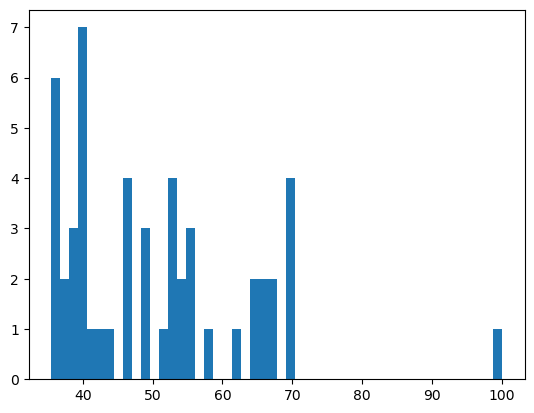

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def histogramme():
    file = np.loadtxt("hit_table.csv",delimiter=",", dtype=str)
    score = (file[:,2]).astype(float)
    print(score)
    plt.hist(score, bins=50)
    
histogramme()

<b>1.3</b>: En analysant le résultat graphique de BLAST vous pouvez dire que cette protéine a des homologues proches? Justifiez votre réponse?

<font color="red"> Réponse : </font>
<font color="blue">
On constate qu'on obtient 3 pics principaux. 1 correspond aux scores les plus bas, et est le plus important, 1 au milieu et un petit avec un très bon score. On en conclut qu'on a peu d'homologues proches et beaucoup d'homologues plus lointain. 
</font>

<b> Question 2</b>: A partir de résultats de BLAST, télécharger les séquences alignées dans l'onglet "Aligments", cliquez sur Download puis FASTA (aligned sequences).

<b> 2.1 </b>:  Ajouter au fichier telechargé la séquence inconnue.fasta, enlever les gaps et les ré-aligner avec l'outil <a href="http://www.ebi.ac.uk/Tools/msa/clustalo/">Clustal omega</a>.
Calculer la séquence consensus de l'alignement et le score avec la matrice Blosum62.

In [ ]:
#alignement obtenu


In [ ]:
#Sequence consensus



In [3]:
#Score de l'aligment
blosum_file = 'BLOSUM62(1).txt'
gap = -5

aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']
q = 21

# lecture des séquences
#Read multi fasta
def extraireAllFastaMulti(fileName):
    """
    Read a FASTA file with several sequences
    input1 fileName: file name
    output1 IdSeq: list of sequences IDs
    output2 Seqs: sequences    
    """ 
    
    Seqs=[]
    IdSeq=[]   
    with open(fileName, 'r') as in_f:
        for line in in_f.readlines():            
            if line[0] == '>':
                IdSeq += [line[1:-1]]
                Seqs += [[]]
            else :
                # on récupère la séquence dans la ligne et on la converti systématiquement en majuscule pour éviter
                # des problèmes d'indexation dans la matrice BLOSUM
                Seqs[-1] += line.replace('\n', '').upper()
                
    return IdSeq, Seqs

idSeqs, Seqs = extraireAllFastaMulti('alignement.fasta')

#read Blosum
def readBlosum(nameFile):
    """
    Read substitution matrix file  
    Input1 fileName : blosum file name
    Output1 Blosum: a dictionary containing BLOSUM matrix, key is a pair of amino acids (alphabetic order) and value is the substitution value. 
    REMARK : You could eliminate the last four columns and last four rows of Blosum file
    """
    blosum ={}
    i = 0
    with open(nameFile, 'r') as in_f:
        for line in in_f.readlines():
            if i == q:
                break
            if line[0] != '#':
                # cas de la première ligne de la matrice:
                if i > 0:
                    line = line[1:-1].split(' ')
                    j = 0
                    for k in range(len(line)):
                        if j == q - 1:
                            break
                        if line[k] != '':
                            blosum[aa[i-1] + aa[j]] = int(line[k])
                            j+=1
                i+=1
    return blosum

blosum = readBlosum(blosum_file)



In [4]:
# score
def SP_score(SeqsM, blosum, gap):
    """
    Compute MSA score based on a substitution matrix and gap penality
    input1 SeqsM: list of aligned sequences
    input2 blosum: substitution matrix
    input3 gap: gap penality
    output1 score: MSA score
    """

   
    n = len(SeqsM) #nb sequences
    K = len(SeqsM[0]) # nb colonnes
    score = np.zeros(K)
    for k in range(K):
        for i in range(n):
            for j in range(i+1,n):
                a1 = SeqsM[i][k]
                a2 = SeqsM[j][k]
                if a1 != '-' and a2 != '-':
                    score[k]+= blosum[a1+a2]
                else :
                    score[k] += gap         
    

    return np.sum(score)/K
SP_score(Seqs, blosum, gap)


-1046.5625

In [36]:
# consensus
def consensus(Seqs):
    res = []
    columns = len(Seqs[0])
    for i in range(columns):
        colonne = Seqs[:,i]
        dico = {}
        for c in colonne:
            if c in dico:
                dico[c] += 1
            else:
                dico[c] = 1
        val = list(dico.values())
        key = list(dico.keys())
        index = np.argmax(val)
        res.append(key[index])
    return res
        
consensus(np.array(Seqs))

['-',
 '-',
 '-',
 '-',
 'K',
 'R',
 'Q',
 'K',
 'R',
 'K',
 'I',
 'S',
 'N',
 'R',
 'E',
 'S',
 'A',
 'R',
 'R',
 'S',
 'R',
 'L',
 'R',
 'K',
 'Q',
 'A',
 'Y',
 'T',
 'E',
 'E',
 'L',
 'E',
 'A',
 'R',
 'V',
 'E',
 'V',
 'L',
 'K',
 'N',
 'E',
 'N',
 'A',
 'S',
 'L',
 'R',
 'A',
 'E',
 'L',
 '-',
 '-',
 'L',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'N',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-']

<b>2.2</b>:  Calculer la PWM à partir de l'alignement.

In [6]:
import sys
import numpy as np
import pandas as pd

aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']
q = 21

def get_pwm(seqs, L, m, alphabet):
    """Input 1 : The MSA (see REMARK of the load_train function)
    Input 2 : the MSA length
    Input 3 : the MSA depth
    Input 4 : the alphabet used (it must be an ordered collection of non-repeating characters)
    Output 1 : position-weight matrix of shape (q, L) where q is len(alphabet)"""
    q = len(alphabet)  
    pwm = np.ones((q, L))
    for i in range(L):
        colonne = seqs[:,i]
        for c in colonne:
            index = alphabet.index(c)
            pwm[index,i] += 1
        
    return pd.DataFrame(pwm/(q + m),  index = aa, columns=np.arange(L))

PWM = get_pwm(np.array(Seqs), len(Seqs[0]), len(Seqs), aa)
print(PWM)

         0         1         2         3         4         5         6   \
A  0.013699  0.054795  0.041096  0.013699  0.013699  0.013699  0.082192   
C  0.013699  0.013699  0.013699  0.013699  0.013699  0.013699  0.013699   
D  0.054795  0.013699  0.082192  0.013699  0.013699  0.013699  0.013699   
E  0.260274  0.013699  0.219178  0.027397  0.027397  0.013699  0.164384   
F  0.013699  0.013699  0.013699  0.013699  0.013699  0.013699  0.013699   
G  0.013699  0.013699  0.013699  0.013699  0.013699  0.013699  0.013699   
H  0.013699  0.013699  0.027397  0.013699  0.013699  0.013699  0.013699   
I  0.013699  0.013699  0.013699  0.027397  0.013699  0.013699  0.041096   
K  0.013699  0.041096  0.013699  0.027397  0.465753  0.150685  0.027397   
L  0.013699  0.013699  0.013699  0.232877  0.013699  0.013699  0.027397   
M  0.013699  0.013699  0.013699  0.013699  0.013699  0.013699  0.027397   
N  0.013699  0.013699  0.027397  0.013699  0.013699  0.013699  0.013699   
P  0.013699  0.027397  0.

<b>2.3</b>: Afficher la meilleure log-vraisemblance de la séquence du fichier teste.fasta ainsi que les positions dans la séquence. 

In [7]:
# ouverture de teste.fasta
idTeste, seqs = extraireAllFastaMulti('teste.fasta')
teste = seqs[0]

import pandas as pd

#computing f0
def f0_calcule(PWM):
    """Input 1 : position-weight matrix of shape (q,L)
    Output 1 : vector of size q containing the null model """   
    return pd.DataFrame([(1/len(PWM[0]))*np.sum(PWM[i]) for i in range(q)], index = PWM.index)

f_0 = f0_calcule(PWM)

#computing log-likehood
def loglikehood(seq, PWM, f_0, L):
    """Input 1 : sequence of which you want to calculate the log-likelihood
    Input 2 : position-weight matrix of shape (q,L)
    Input 3 : null model vector of length q
    Input 4 : MSA length
    Output 1 : log-likelihood of the sequence seq"""
    f = 1 # proba de ma séquence selon modèle train
    f0 = 1 # proba de ma séquence selon modèle nul
    # seq = array d'entiers qui représente lettre 
    for i in range(L-1):
        f0 = f0 * f_0.loc[seq[i]]
        f = f * PWM.loc[seq[i]][i]
    prod = f/f0    
    ll = np.log2(prod)     
    return ll[0]

#test
L=80
print(loglikehood(teste[:L], PWM, f_0, L))

#computing sliding_window 
def sliding_window (seq, k):
    """Input 1 : sequence of length > k
    Input 2 : window length (int)
    Output 1 : list of windows of length k generated from sequence seq"""
    n = len(seq)
    windows = [] # initialise une liste de listes
    for i in range(n-k):
        print(seq[i: i + k])
        windows += [seq[i: i + k]]   
    return windows

# Find all subsequences of length L from the sequence in testseq.txt
subseqs = sliding_window(teste,L)
print(subseqs)

-58.43794744367361
['M', 'E', 'D', 'Q', 'E', 'R', 'I', 'K', 'V', 'E', 'R', 'K', 'R', 'L', 'R', 'N', 'R', 'L', 'A', 'R', 'T', 'K', 'C', 'R', 'K', 'R', 'K', 'L', 'E', 'R', 'I', 'A', 'R', 'L', 'E', 'A', 'F', 'V', 'K', 'T', 'L', 'K', 'A', 'E', 'N', 'L', 'G', 'L', 'S', 'N', 'T', 'A', 'G', 'C', 'L', 'R', 'E', 'Q', 'V', 'A', 'Q', 'L', 'K', 'K', 'K', 'V', 'M', 'T', 'H', 'V', 'S', 'N', 'G', 'C', 'Q', 'L', 'L', 'L', 'P', 'V']
['E', 'D', 'Q', 'E', 'R', 'I', 'K', 'V', 'E', 'R', 'K', 'R', 'L', 'R', 'N', 'R', 'L', 'A', 'R', 'T', 'K', 'C', 'R', 'K', 'R', 'K', 'L', 'E', 'R', 'I', 'A', 'R', 'L', 'E', 'A', 'F', 'V', 'K', 'T', 'L', 'K', 'A', 'E', 'N', 'L', 'G', 'L', 'S', 'N', 'T', 'A', 'G', 'C', 'L', 'R', 'E', 'Q', 'V', 'A', 'Q', 'L', 'K', 'K', 'K', 'V', 'M', 'T', 'H', 'V', 'S', 'N', 'G', 'C', 'Q', 'L', 'L', 'L', 'P', 'V', 'K']
['D', 'Q', 'E', 'R', 'I', 'K', 'V', 'E', 'R', 'K', 'R', 'L', 'R', 'N', 'R', 'L', 'A', 'R', 'T', 'K', 'C', 'R', 'K', 'R', 'K', 'L', 'E', 'R', 'I', 'A', 'R', 'L', 'E', 'A', 'F', 'V'

In [8]:
#computing log-likelihood
def likelihoodAllSousSeq(subseqs, PWM, f_0, k): #(subseqs, k)
    """Input 1 : list of all subsequences of length k
    Input 2 : position-weight matrix of length shape (q,k)
    Input 3 : null model vector of length k
    Input 4 : length of each subsequence
    Output 1 : log-likelihood vector of length len(subseqs) - k + 1
    
    REMARK : The length of the subsequences must match the
    number of columns in the PWM and the length of the null model!"""
    # le modèle null fait la longueur de l'alphabet, ce qui ne correspond pas au nombre de colonnes de PWM (position)
    if k != len(PWM.iloc[0]):
        print('Erreur de longueur!!!')
        return
    lhs = [loglikehood(seq, PWM, f_0, k) for seq in subseqs]
    return lhs


def plot_likelihood(lhs): #(lhs,k)
    """Input 1 : log-likelihood vector"""
    plt.figure(figsize=(8,6))
    plt.plot(lhs)
    plt.title("Vraissemblance des sous-séquences par rapport au modèle")
    plt.xlabel("position de la sous séquence")
    plt.ylabel("log-likelyhood")
    plt.savefig('likelihood.png', dpi=300)
    return


In [9]:
#plotting log-likelihood for each initial position
lhs = likelihoodAllSousSeq(subseqs, PWM, f_0, L)
print('position dans la séquence:', np.argmax(lhs))
print('likelihood maximale:', np.max(lhs))

position dans la séquence: 3
likelihood maximale: 11.180488406870992


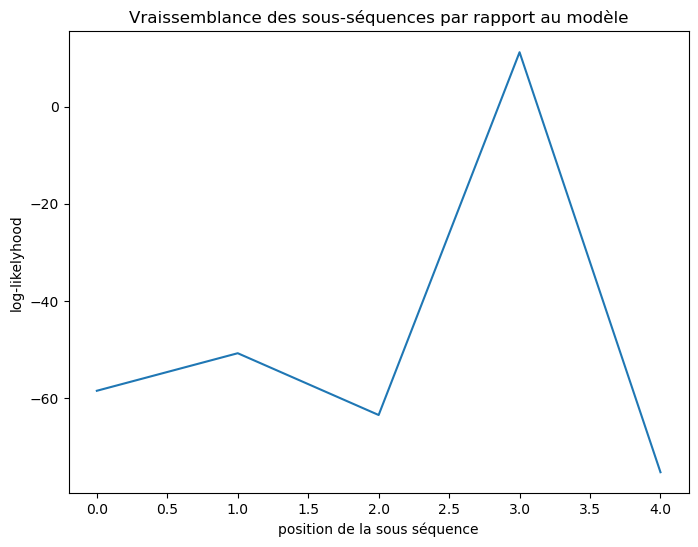

In [10]:
plot_likelihood(lhs)

<b> Question 3 </b>:   A partir de l'alignement de la question précédente construit le modèle HMMer en utilisant la version 3. Répondez aux questions suivantes :

<b> 3.1 </b>:  Combien d'états Match observez-vous?

<font color="red"> Réponse : </font>
<font color="blue">
On 60 états de match
</font>

<b> 3.2 </b>: Chercher la séquence du fichier teste.fasta en utilisant hmmsearch (default parameters). Quelle est le c-évalués et le score?

<font color="red"> Réponse : </font>
<font color="blue">
score =  23.6, c-evalue =  2.3e-09
</font>

<b> 3.3</b>:  A partir de résultats obtenus avez vous une indication de la fonction ou domaine fonctionnelle de la protéine inconnue? Si oui télécharger le modèle HMMer correspondant du site de pfam puis refaire la question 3.2, en utilisant l'option --cut_ga 

<font color="red"> Réponse : </font>
<font color="blue">
On pense que c'est G-box-binding factor 1
</font>

<b> Question 4 </b>:  Faire une fonction pour éliminer toutes les colonnes de l'argument qui ont au moins un gap. Puis chercher le motif de taille k = 10 avec l'algorithme EM. 

In [11]:
# nos séquences sont dans Seqs depuis le readMultiAlign
def eliminate_gap(Seqs):
    seqs = np.array(Seqs)
    res = []
    for i in range(len(seqs[0])):
        colonne = seqs[:, i]
        if ((np.where(colonne=='-', 1, 0)).sum() == 0):
            res.append(colonne)
    return np.array(res).T

newseqs = eliminate_gap(Seqs)
print(newseqs[0])
print(Seqs[0])

['K' 'K' 'R' 'K' 'R' 'K' 'L' 'S' 'N' 'R' 'E' 'S' 'A' 'R' 'R' 'S' 'R' 'L'
 'K' 'K' 'Q' 'K' 'L' 'M' 'E' 'D' 'T' 'I' 'H' 'E' 'I' 'S' 'S' 'L' 'E' 'R'
 'R' 'I' 'K' 'E' 'N']
['-', '-', '-', '-', 'K', 'K', 'R', 'K', 'R', 'K', 'L', 'S', 'N', 'R', 'E', 'S', 'A', 'R', 'R', 'S', 'R', 'L', 'K', 'K', 'Q', 'K', 'L', 'M', 'E', 'D', 'T', 'I', 'H', 'E', 'I', 'S', 'S', 'L', 'E', 'R', 'R', 'I', 'K', 'E', 'N', 'S', 'E', 'R', 'C', 'R', 'A', 'V', 'K', 'Q', 'R', 'L', 'D', 'S', 'V', 'E', 'T', 'E', 'N', 'A', 'G', 'L', 'R', 'S', 'E', 'K', 'I', 'W', 'L', 'S', 'S', 'Y', 'V', 'S', 'D', 'L']


In [12]:
def initialiseP(seqs, w, alph):
    """
    Initialise pc,k
    input seqs : list of sequences
    input w : motif length
    input alph : alphabet (nucleotides or amino acids)
    output P: position probability matrix
    """
    q=len(alph)
    P = np.zeros((q, w+1))
    # initialisation du model nul
    P[:, 0] = [1/q] * q
    # on tire une séquence de façon aléatoire
    rand_index_seq = np.random.randint(0, len(seqs))
    sequence = seqs[rand_index_seq]
    # on tire un motif de façon aléatoire
    rand_index_motif = np.random.randint(0, len(sequence) - w)
    motif = sequence[rand_index_motif:rand_index_motif + w]
    # on remplit les colones restantes
    for i in range(len(motif)):
        # la case du caractère du motif est mise à 0.5
        c_k = alph.index(motif[i])
        P[c_k][i + 1] = 0.5
        
        # les autres sont remplis équitablement de sorte à ce que la colonne somme à 1
        for j in range(q):
            if c_k != j:
                P[j][i + 1] = (1 - 0.5) / (q - 1)
    return P

#test
w = 10
p = initialiseP(newseqs, w, aa)
print (p)

[[0.04761905 0.025      0.025      0.025      0.025      0.025
  0.025      0.025      0.025      0.025      0.025     ]
 [0.04761905 0.025      0.025      0.025      0.025      0.025
  0.025      0.025      0.025      0.025      0.025     ]
 [0.04761905 0.025      0.025      0.025      0.025      0.025
  0.025      0.025      0.025      0.025      0.025     ]
 [0.04761905 0.025      0.025      0.025      0.025      0.025
  0.025      0.025      0.025      0.025      0.025     ]
 [0.04761905 0.025      0.025      0.025      0.025      0.025
  0.025      0.025      0.025      0.025      0.025     ]
 [0.04761905 0.025      0.025      0.025      0.025      0.025
  0.025      0.025      0.025      0.025      0.025     ]
 [0.04761905 0.025      0.025      0.025      0.025      0.025
  0.025      0.025      0.025      0.025      0.025     ]
 [0.04761905 0.025      0.025      0.025      0.025      0.025
  0.025      0.025      0.025      0.025      0.025     ]
 [0.04761905 0.5        0.025   

In [13]:
def initialiseZ(seqs, w):
    """
    Initialise Z
    input seqs : list of sequences
    input w : motif length
    output Z :  matrix of motif start positions
    """
    n = len(seqs)
    L = len(seqs[0])
    Z = np.ones((n, (L - w + 1)))
    return Z

Z = initialiseZ(Seqs, w)
print(Z)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [14]:
# fonction intermdédiaire: calcule Z pour une séquence donnée à partir de P
def compute_Z_for_seq(seq, P, w, alph):
    res = []
    # parcours des positions de la séquence
    for i in range(len(seq) - w + 1):
        # motif courrant
        motif = seq[i: i + w]
        # calcul de la probabilité du motif
        proba = 1
        for i in range(w):
            c_k = alph.index(motif[i])
            proba = proba * P[c_k][i + 1]
        # calcul des probas hors-motif (on suppose que le model nul est systématiquement equiprobable)
        proba_nulle = P[0][0] 
        proba = proba * pow(proba_nulle, len(seq) - w)
        
        res.append(proba)
    return res

In [15]:
def E_step(seqs, P, w, alph):
    """
    Implement Expectation step
    input seqs : list of sequences
    input P : position probability matrix
    input Z :  matrix of motif start positions
    input w : motif length
    input alph : alphabet (nucleotides or amino acids)
    output Z :  matrix of motif start positions
    """
    
    Z = initialiseZ(seqs, w)
    # on appelle la 
    for i in range(len(Z)):
        Z[i] = compute_Z_for_seq(seqs[i], P, w, alph)
    return Z

def normaliseZ(z):
    """
    Normalise Z matrix
    input Z : unnormalised matrix
    output Zn : normalised matrix
    """
    return np.array([row/sum(row) for row in z])

Z = E_step(seqs, p, w, aa)
z_norm = normaliseZ(Z)
print(z_norm)

[[5.00728560e-06 4.00582848e-02 1.00145712e-04 1.00145712e-04
  2.00291424e-03 1.00145712e-04 2.00291424e-03 4.00582848e-02
  2.00291424e-03 1.00145712e-04 2.00291424e-03 2.00291424e-03
  1.00145712e-04 1.00145712e-04 1.00145712e-04 2.00291424e-03
  2.00291424e-03 5.00728560e-06 2.00291424e-03 2.00291424e-03
  1.00145712e-04 8.01165696e-01 1.00145712e-04 2.00291424e-03
  2.00291424e-03 1.00145712e-04 1.00145712e-04 5.00728560e-06
  2.00291424e-03 5.00728560e-06 5.00728560e-06 1.00145712e-04
  5.00728560e-06 1.00145712e-04 5.00728560e-06 1.00145712e-04
  2.00291424e-03 5.00728560e-06 2.00291424e-03 5.00728560e-06
  5.00728560e-06 4.00582848e-02 5.00728560e-06 5.00728560e-06
  5.00728560e-06 5.00728560e-06 1.00145712e-04 5.00728560e-06
  5.00728560e-06 5.00728560e-06 5.00728560e-06 2.00291424e-03
  5.00728560e-06 5.00728560e-06 2.00291424e-03 1.00145712e-04
  5.00728560e-06 1.00145712e-04 2.00291424e-03 2.00291424e-03
  1.00145712e-04 1.00145712e-04 1.00145712e-04 4.00582848e-02
  1.0014

In [16]:
def M_step(seqs, Z, w, alph):
    """
    Implement Expectation step
    input seqs : list of sequences
    input Z :  matrix of motif start positions
    input w : motif length
    input alph : alphabet (nucleotides or amino acids)
    output P : position probability matrix
    """
    n = len(seqs)
    L = len(seqs[0])
    q = len(alph)
    
    # initialisation de P (avec pseudo-count)
    P = np.ones((q, w+1))
    
    # on va parcourir tous les motifs de toutes les séquences et ajouter
    # au fur et à mesure les probabilités du motif dans les cases
    # appropriées de P
    for i in range(n):
        for j in range(L - w + 1):
            # on récupère le motif
            motif = seqs[i][j:j + w]
            # parcours du motif
            for k in range(len(motif)):
                # caractère courant
                c_k = alph.index(motif[k])
                # position du caractère dans le motif
                pos = k + 1
                # ajout de la probabilité Z_i,j
                P[c_k][pos] += Z[i][j]
                
    # normalisation des colonnes (avec pseudo-count) : division par somme des Z + longueur alphabet
    # hors la somme des Z vaut le nombre de séquences, puisque chaque séquence a ses Z qui somment à 1
    P = P / (q + n)
    
    # ajout du model nul
    P[:, 0] = [1/q] * q
    return P

P = M_step(seqs, z_norm, w, aa)
print(P)

[[0.04761905 0.045737   0.04736733 0.04555537 0.04563754 0.0455597
  0.0455597  0.04555537 0.04573268 0.04573291 0.04547344]
 [0.04761905 0.04545955 0.08187595 0.04555037 0.04554604 0.04554604
  0.04545955 0.04554604 0.04555037 0.04545955 0.04546388]
 [0.04761905 0.0454591  0.04727538 0.04545477 0.04545455 0.04545455
  0.04545455 0.04545455 0.04545455 0.04545455 0.04545455]
 [0.04761905 0.04746269 0.04555993 0.04919658 0.04737598 0.04555105
  0.04581894 0.04555515 0.08196722 0.04728926 0.04555082]
 [0.04761905 0.04554559 0.0454591  0.04545477 0.0454591  0.04545477
  0.0454591  0.04545477 0.04545477 0.04554559 0.04545933]
 [0.04761905 0.04546388 0.04554604 0.04545523 0.04545523 0.04545955
  0.04727583 0.0454641  0.04545546 0.04555059 0.04728038]
 [0.04761905 0.0454591  0.04545477 0.04545477 0.04545477 0.0454591
  0.04727538 0.0454591  0.04546365 0.04545933 0.04554581]
 [0.04761905 0.04554581 0.04545933 0.04563663 0.04545933 0.04546365
  0.04727993 0.04554581 0.04554559 0.0454591  0.0818

In [24]:
def retour_motif(alph,P):
    motif = ""
    for i in range(P.shape[1]):
        maxi = np.max(P[i,:])
        maxi_indices = np.where(P[i,:]== maxi)[0]
        if len(maxi_indices)>1:
            motif = "["
            for i in maxi_indices:
                motif+=aa[i]
            motif = "]"
        else:
            motif += aa[maxi_indices[0]]
        
    return motif

motif = retour_motif(aa,P)
print(motif)
        

ADAKAAAMCIA
